In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
# Load data

# Pytorch custom data helpers
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Data loading utilities
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Define classes
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


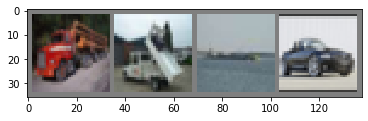

truck truck  ship   car


In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Unnormalize and display image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Get batch from data loader
dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
import torch.nn as nn
import torch.nn.functional as F

# CNN Defined see section 3 for detailed explanation
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [11]:
import torch.optim as optim

# Define loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
# Train the model

# Two times through the data
for epoch in range(2):
    running_loss = 0.0
    # Iterate through training set
    for i, data in enumerate(trainloader, 0):
        # Update parameters based on loss
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print performance statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.217
[1,  4000] loss: 1.847
[1,  6000] loss: 1.630
[1,  8000] loss: 1.566
[1, 10000] loss: 1.466
[1, 12000] loss: 1.448
[2,  2000] loss: 1.388
[2,  4000] loss: 1.342
[2,  6000] loss: 1.315
[2,  8000] loss: 1.332
[2, 10000] loss: 1.277
[2, 12000] loss: 1.261
Finished Training


In [13]:
# Save parameters
PATH = './model/cifar_cnn.pth'
torch.save(net.state_dict(), PATH)

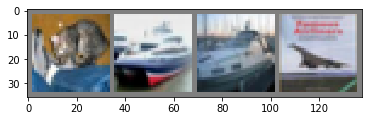

GroundTruth:    cat  ship  ship plane
Predicted:  plane plane plane plane


In [41]:
# Load parameter later
net_2 = Net()
net.load_state_dict(torch.load(PATH))

# Get test data
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Predictions
outputs = net_2(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]for j in range(4)))

In [42]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# Do not use gradients when making predictions (saves time)
with torch.no_grad():
    # Iterate through test data
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 54 %
Accuracy of   car : 74 %
Accuracy of  bird : 40 %
Accuracy of   cat : 33 %
Accuracy of  deer : 36 %
Accuracy of   dog : 31 %
Accuracy of  frog : 85 %
Accuracy of horse : 59 %
Accuracy of  ship : 79 %
Accuracy of truck : 62 %
